In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## SubCellular Localization

計算 subcellular localization 分類數量

In [69]:
rna_df = pd.read_csv("data/society/All RNA subcellular localization data.txt", sep="\t")

/home/jand/.conda/envs/jand_venv/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2714: DtypeWarning: Columns (8) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [70]:
sub_df = rna_df[rna_df['RNA_category'].isin(['antisense RNA', 'lncRNA', 'lincRNA', 'processed_transcript'])]
sub_df = sub_df[sub_df['Species'] == 'Homo sapiens']
sub_df = sub_df.dropna(subset=['Gene_ID'])

In [71]:
# sub_df.value_counts('SubCellular_Localization')
# sub_df.head(10)

cytosolic = ['Cytosol', 'Cytoplasm', 'Membrane', 'Insoluble cytoplasm', 'Ribosome', 'Ribosome-free cytosol', 'Mitochondrion', 'Endoplasmic reticulum', 'Microsome']
nucleus = ['Nucleus', 'Nucleoplasm', 'Chromatin', 'Nucleolus', 'Nuclear', 'Nuclear speckle', 'Paraspeckle', 'Paraspeckles in the nucleus', 'Nuclear periphery', 'Speckle periphery', 'Nuclear(exclusion from nucleoli)', 'Nuclear membrane', 'Perinuclear', 'Periphery of the nucleus']

sub_df['SubCellular_Localization'] = sub_df['SubCellular_Localization'].replace(cytosolic, 'Cytosolic')
sub_df['SubCellular_Localization'] = sub_df['SubCellular_Localization'].replace(nucleus, 'Nucleus')
sub_df = sub_df[sub_df['SubCellular_Localization'].isin(["Nucleus", "Cytosolic"])]
# print(sub_df['SubCellular_Localization'].value_counts())

value_count = sub_df[['Gene_ID', 'SubCellular_Localization']].value_counts()

value_count_df = value_count.reset_index()
local = []
for gene_id in sub_df['Gene_ID'].unique():
    nuc_count = value_count[gene_id]['Nucleus'] if 'Nucleus' in value_count[gene_id].index else 0
    cyt_count = value_count[gene_id]['Cytosolic'] if 'Cytosolic' in value_count[gene_id].index else 0
    local.append([gene_id, nuc_count, cyt_count])

local_df = pd.DataFrame(local, columns=['Gene_ID', 'Nucleus', 'Cytosolic'])

In [72]:
local_df.to_csv("data/society/Gene_ID_Nucleus_Cytosolic_0315.csv", index=False)

In [73]:
len(local_df['Gene_ID'].unique())

1106

## subcellular localization

大於門檻分類

In [11]:
local_df = pd.read_csv("data/society/Gene_ID_Nucleus_Cytosolic_0315.csv")

In [8]:
nuc_sum = 0
mixed = 0
cyt_sum = 0
for i in range(len(local_df)):
    if local_df["Nucleus"][i] / (local_df["Nucleus"][i] + local_df["Cytosolic"][i]) > 0.75:
        local_df["SubCellular_Localization>0.75"][i] = "Nucleus"
    elif local_df["Cytosolic"][i] / (local_df["Nucleus"][i] + local_df["Cytosolic"][i]) > 0.75:
        local_df["SubCellular_Localization>0.75"][i] = "Cytosolic"
    else:
        local_df["SubCellular_Localization>0.75"][i] = "Mixed"
print("nuc_sum= %d, cyt_sum= %d, Mixed= %d" % (nuc_sum, cyt_sum, mixed))
local_df.head(5)

nuc_sum= 0, cyt_sum= 0, Mixed= 0


/home/jand/.conda/envs/jand_venv/lib/python3.6/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/home/jand/.conda/envs/jand_venv/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/jand/.conda/envs/jand_venv/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versu

,Gene_ID,Nucleus,Cytosolic,SubCellular_Localization>0.75
0,NCBI:100048912,7,4,Mixed
1,NCBI:100124700,9,3,Mixed
2,NCBI:100128098,0,1,Cytosolic
3,NCBI:100128191,1,3,Mixed
4,NCBI:100129387,4,1,Nucleus


In [9]:
local_df.to_csv("data/society/Gene_ID_Nucleus_Cytosolic_075_0315.csv", index=False)

## 包含結果的 Sequence

In [3]:
jand_df = pd.read_csv("data/society/Gene_ID_Nucleus_Cytosolic_075_0316.csv")
seq_df = pd.read_csv('data/society/human_RNA_sequence.fasta')

In [9]:
with open("data/society/human_RNA_sequence.fasta") as f:
    lines = f.read().split('>')[1:]
    seq_array = []
    for line in lines:
        line_array = line.split("\n")
        seq = line_array[1]
        gene_id, gene_name = line_array[0].split('|')
        seq_array.append([gene_id, gene_name, seq])

In [11]:
seq_df = pd.DataFrame(seq_array, columns=["Gene_ID", "Gene_Name", "Sequence"])
seq_df = seq_df.drop_duplicates()
seq_df.to_csv("data/society/human_RNA_sequence.csv", index=False)

In [12]:
seq_df = pd.read_csv("data/society/human_RNA_sequence.csv")

In [15]:
with open("data/society/human_RNA_sequence_of_cdhit.fasta", 'w') as f:
    for i in range(len(seq_df)):
        f.write(">%s|%s\n%s\n" % (seq_df['Gene_ID'][i], seq_df['Gene_Name'][i], seq_df['Sequence'][i]))

In [1]:
with open("data/society/human_RNA_sequence_cdhit80") as f:
    lines = f.read().split('>')[1:]
    seq_array = []
    for line in lines:
        line_array = line.split("\n")
        seq = line_array[1]
        gene_id, gene_name = line_array[0].split('|')
        seq_array.append([gene_id, gene_name, seq])

In [5]:
seq_df = pd.DataFrame(seq_array, columns=["Gene_ID", "Gene_Name", "Sequence"])
seq_df.to_csv("data/society/human_RNA_sequence_cdhit80.csv", index=False)

In [74]:
import re
with open("data/society/human_RNA_sequence_cdhit_0320.clstr") as f:
    arrays = f.read().split(">Cluster")
    cluster_array = []
    for cluster in arrays[1:]:
        cluster_dict = dict()
        cluster_dict["other"] = []
        for row in cluster.split("\n")[1:-1]:
            if "*" in row:
                cluster_dict["main"] = row[row.index(">")+1:row.index("|")]
            cluster_dict["other"].append(row[row.index(">")+1:row.index("|")])
        cluster_array.append(cluster_dict)

In [75]:
for i in range(len(cluster_array)):
    cluster_array[i]['other'] = np.unique(cluster_array[i]['other'])

In [83]:
data_y = pd.read_csv("data/society/Gene_ID_Nucleus_Cytosolic_075_0316.csv")

In [77]:
data = pd.read_csv("data/society/human_RNA_sequence.csv")

In [78]:
for i in range(len(cluster_array)):
    cluster_array[i]['other'] = np.unique(data[data['Gene_Name'].isin(cluster_array[i]['other'])]['Gene_ID'])
    # print(np.unique(data[data['Gene_Name'].isin(cluster_array[i]['other'])]['Gene_ID']))

In [80]:
id2seqid_array = []
for main_other in cluster_array:
    for ncbi_id in main_other['other']:
        id2seqid_array.append([main_other['main'], ncbi_id])
id2seqid_df = pd.DataFrame(id2seqid_array, columns=['Gene_Name', 'Gene_ID'])

In [82]:
id2seqid_df.to_csv("data/society/cdhit80_0320_GeneName_GeneID.csv", index=False)

In [84]:
merge_df = data_y.merge(id2seqid_df, how='inner', on='Gene_ID')

In [87]:
merge_df.to_csv("data/society/Gene_ID_Nucleus_Cytosolic_Gene_Name.csv", index=False)

In [104]:
merge_df = merge_df[merge_df["SubCellular_Localization>0.75"] != "Mixed"][["Gene_Name", "SubCellular_Localization>0.75"]]

$ cd-hit -i data/society/human_RNA_sequence_of_cdhit.fasta -o data/society/human_RNA_sequence_cdhit_0320 -c 0.8 -n 5 -M 0 -T 0

In [92]:
merge_df = pd.read_csv("data/society/Gene_ID_Nucleus_Cytosolic_Gene_Name.csv")[["Gene_ID", "Gene_Name", "SubCellular_Localization>0.75"]]
seq_df = pd.read_csv("data/society/human_RNA_sequence_cdhit_0320.csv")[["Gene_Name", "Sequence"]]

In [93]:
seq2name2loc = merge_df.merge(seq_df, how='inner', on='Gene_Name')
seq2name2loc = seq2name2loc.rename(columns={"SubCellular_Localization>0.75": "SubCellular_Localization"})
seq2name2loc.head(2)
# seq2name2loc.to_csv("data/society/cdhit80_0320_loc75.csv", index=False)

,Gene_ID,Gene_Name,SubCellular_Localization,Sequence
0,NCBI:100048912,NR_003529.3,Mixed,AGCTACATCCGTCACCTGACACGGCCCTACCAGGAACAGCCGCGCT...
1,NCBI:100048912,NR_047532.1,Mixed,AGCTACATCCGTCACCTGACACGGCCCTACCAGGAACAGCCGCGCT...


In [113]:
seq2name2loc = pd.read_csv("data/society/cdhit80_0320_loc75.csv")

In [115]:
seq2name2loc = seq2name2loc[['Gene_Name', 'Sequence', 'SubCellular_Localization']].drop_duplicates()

In [165]:
with open("data/society/human_RNA_sequence_cdhit80_0320_hasLoc.fasta", 'w') as f:
    for i in range(len(seq2name2loc)):
        f.write(">%s\n%s\n" % (seq2name2loc['Gene_Name'][i], seq2name2loc['Sequence'][i]))

In [96]:
seq2name2loc['Sequence_length'] = seq2name2loc['Sequence'].apply(len)

In [106]:
seq2name2loc = seq2name2loc[seq2name2loc["SubCellular_Localization"] != "Mixed"]

In [119]:
data = pd.read_csv("data/society/Gene_ID_Nucleus_Cytosolic_075_0316.csv")
data = data.rename(columns={"SubCellular_Localization>0.75": "SubCellular_Localization"})
data.head(10)

,Gene_ID,Nucleus,Cytosolic,SubCellular_Localization
0,NCBI:100048912,7,4,Mixed
1,NCBI:100124700,9,3,Mixed
2,NCBI:100128098,0,1,Cytosolic
3,NCBI:100128191,1,3,Mixed
4,NCBI:100129387,4,1,Nucleus
5,NCBI:100129550,2,1,Mixed
6,NCBI:100129617,0,1,Cytosolic
7,NCBI:100130581,1,1,Mixed
8,NCBI:100130967,1,1,Mixed
9,NCBI:100287314,0,1,Cytosolic


In [102]:
print("all: %d" % (len(seq2name2loc)))
print(seq2name2loc['SubCellular_Localization'].value_counts())
print()
print("5000>=: %d" % (len(seq2name2loc[seq2name2loc['Sequence_length'] <= 5000])))
print(seq2name2loc[seq2name2loc['Sequence_length'] <= 5000]['SubCellular_Localization'].value_counts())

all: 921
Nucleus      790
Cytosolic    131
Name: SubCellular_Localization, dtype: int64

5000>=: 867
Nucleus      740
Cytosolic    127
Name: SubCellular_Localization, dtype: int64


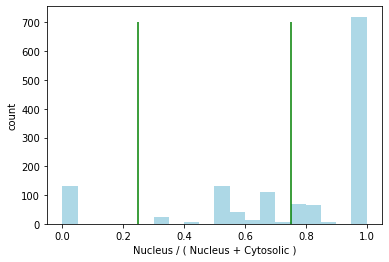

In [4]:
n_c = pd.read_csv("data/society/cdhit80_0320_loc75.csv")[['Nucleus', 'Cytosolic']]
n_c['N/C'] = n_c['Nucleus'] / (n_c['Cytosolic'] + n_c['Nucleus'])
n_c.head(10)


plt.hist(n_c['N/C'], bins=np.arange(0.0, 1.05, 0.05), color = 'lightblue')
plt.xlabel('Nucleus / ( Nucleus + Cytosolic )')
plt.vlines(0.75, 0, 700,color="green")
plt.vlines(0.25, 0, 700,color="green")
plt.ylabel('count')
plt.show()

923
738
185
all
Nucleus      792
Cytosolic    131
Name: SubCellular_Localization, dtype: int64

train
Nucleus      634
Cytosolic    104
Name: SubCellular_Localization, dtype: int64

test
Nucleus      158
Cytosolic     27
Name: SubCellular_Localization, dtype: int64


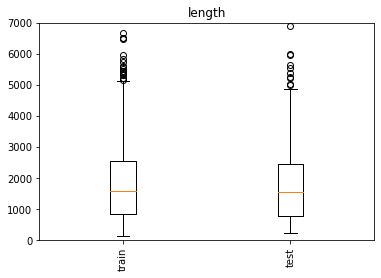

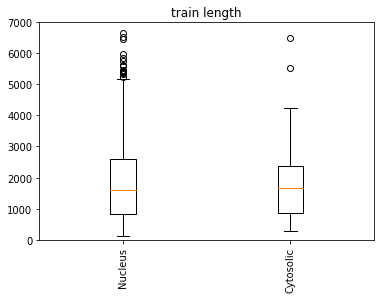

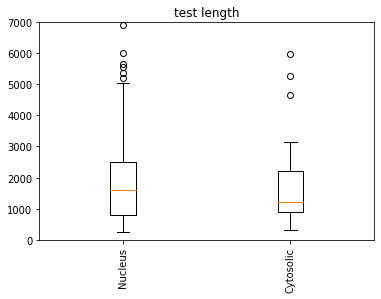

In [14]:
data = pd.read_csv("data/society/cdhit80_0320_loc75_NC.csv")
data['Sequence_length'] = data['Sequence'].apply(len)

idx = np.arange(len(data))
np.random.seed(1212)
np.random.shuffle(idx)

train_test_split_idx = int(len(idx)*0.8)
train_idx = idx[:train_test_split_idx]
test_idx = idx[train_test_split_idx:]

train_x = data[['Sequence', 'Sequence_length']].loc[train_idx]
train_y = data['SubCellular_Localization'].loc[train_idx]
test_x = data[['Sequence', 'Sequence_length']].loc[test_idx]
test_y = data['SubCellular_Localization'].loc[test_idx]

print(len(idx))
print(len(train_idx))
print(len(test_idx))
print("all")
print(data['SubCellular_Localization'].value_counts())
print("")
print("train")
print(train_y.value_counts())
print("")
print("test")
print(test_y.value_counts())


plt.boxplot([train_x['Sequence_length'], test_x['Sequence_length']])
plt.xticks([1, 2], ['train', 'test'], rotation ='vertical') 
plt.title("length")
plt.ylim(0, 7000)
plt.show()

plt.boxplot([train_x[train_y == "Nucleus"]['Sequence_length'], train_x[train_y == "Cytosolic"]['Sequence_length']])
plt.xticks([1, 2], ['Nucleus', 'Cytosolic'], rotation ='vertical') 
plt.title("train length")
plt.ylim(0, 7000)
plt.show()

plt.boxplot([test_x[test_y == "Nucleus"]['Sequence_length'], test_x[test_y == "Cytosolic"]['Sequence_length']])
plt.xticks([1, 2], ['Nucleus', 'Cytosolic'], rotation ='vertical') 
plt.title("test length")
plt.ylim(0, 7000)
plt.show()

In [15]:
np.save("data/society/train_idx_0320_loc75.npy", train_idx)
np.save("data/society/test_idx_0320_loc75.npy", test_idx)

In [23]:
data = pd.read_csv("data/society/cdhit80_0320_loc75_NC.csv")
name2id = pd.read_csv("data/society/cdhit80_0320_hasLoc_GeneName2idx.csv")
train_idx = np.load("data/society/train_idx_0320_loc75.npy")
test_idx = np.load("data/society/test_idx_0320_loc75.npy")

In [20]:
train_y = data.loc[train_idx]['SubCellular_Localization']
test_y = data.loc[test_idx]['SubCellular_Localization']

In [52]:
train_y = train_y.replace(["Cytosolic", "Nucleus"], [0, 1])
test_y = test_y.replace(["Cytosolic", "Nucleus"], [0, 1])

In [53]:
np.save("data/society/train_y_0320_loc75_01.npy", train_y)
np.save("data/society/test_y_0320_loc75_01.npy", test_y)

In [35]:
train_name = data.loc[train_idx][['Gene_Name']]
test_name = data.loc[test_idx][['Gene_Name']]

In [36]:
train_hasloc_idx = train_name.merge(name2id, how='left', on='Gene_Name')['idx']
train_hasloc_idx = train_hasloc_idx.tolist()
test_hasloc_idx = test_name.merge(name2id, how='left', on='Gene_Name')['idx']
test_hasloc_idx = test_hasloc_idx.tolist()

In [37]:
np.save("data/society/train_idx_0320_loc75_hasloc_train_idx.npy", train_hasloc_idx)
np.save("data/society/test_idx_0320_loc75_hasloc_train_idx.npy", test_hasloc_idx)

In [2]:
train_hasloc_idx = np.load("data/society/train_idx_0320_loc75_hasloc_train_idx.npy")
test_hasloc_idx = np.load("data/society/test_idx_0320_loc75_hasloc_train_idx.npy")

In [37]:
from os import listdir
from os.path import join
from os.path import isfile

dir_path = "data/linear_features/linear/0320/train/"
onlyfiles = [f for f in listdir(dir_path) if isfile(join(dir_path, f))]
for file_name in onlyfiles:
    data = np.load(dir_path + file_name)
    data_x = data.reshape(data.shape[0], -1)
    np.save(dir_path + file_name.split(".")[0] + '_2d', data_x)
    print(file_name)
    print(data.shape)
    print(data_x.shape)
    # data = np.load(dir_path + file_name)
    # # data = np.genfromtxt(dir_path + file_name, delimiter=',')
    # train_x = data[train_hasloc_idx]
    # test_x = data[test_hasloc_idx]
    # np.save(dir_path + 'train/' + file_name.split('.')[0] + '_train', train_x)
    # np.save(dir_path + 'test/' + file_name.split('.')[0] + '_test', test_x)

k1p4nor0_train.npy
(738, 4, 5)
(738, 20)
k1p4nor1_train.npy
(738, 4, 5)
(738, 20)
k1p4nor2_train.npy
(738, 4, 5)
(738, 20)
k1p4nor3_train.npy
(738, 4, 5)
(738, 20)
k1p6nor0_train.npy
(738, 4, 7)
(738, 28)
k1p6nor1_train.npy
(738, 4, 7)
(738, 28)
k1p6nor2_train.npy
(738, 4, 7)
(738, 28)
k1p6nor3_train.npy
(738, 4, 7)
(738, 28)
k1p8nor0_train.npy
(738, 4, 9)
(738, 36)
k1p8nor1_train.npy
(738, 4, 9)
(738, 36)
k1p8nor2_train.npy
(738, 4, 9)
(738, 36)
k1p8nor3_train.npy
(738, 4, 9)
(738, 36)
k1p10nor0_train.npy
(738, 4, 11)
(738, 44)
k1p10nor1_train.npy
(738, 4, 11)
(738, 44)
k1p10nor2_train.npy
(738, 4, 11)
(738, 44)
k1p10nor3_train.npy
(738, 4, 11)
(738, 44)
k2p4nor0_train.npy
(738, 16, 5)
(738, 80)
k2p4nor1_train.npy
(738, 16, 5)
(738, 80)
k2p4nor2_train.npy
(738, 16, 5)
(738, 80)
k2p4nor3_train.npy
(738, 16, 5)
(738, 80)
k2p6nor0_train.npy
(738, 16, 7)
(738, 112)
k2p6nor1_train.npy
(738, 16, 7)
(738, 112)
k2p6nor2_train.npy
(738, 16, 7)
(738, 112)
k2p6nor3_train.npy
(738, 16, 7)
(738, 1

In [9]:
data = pd.read_csv("data/society/cdhit80_0320_loc75_NC.csv")
data['Sequence_length'] = data['Sequence'].apply(len)
data[["SubCellular_Localization", "Seq_ID", "Sequence_length"]].drop_duplicates()

,SubCellular_Localization,Seq_ID,Sequence_length
0,Cytosolic,NR_034129.1,574
1,Nucleus,NR_024490.1,4139
2,Cytosolic,NR_045112.1,1926
3,Cytosolic,NR_040245.1,1895
4,Nucleus,NR_040066.1,2501
...,...,...,...
918,Nucleus,NR_046438.2,4115
919,Nucleus,NR_034104.1,1157
920,Nucleus,NR_027263.1,1281
921,Nucleus,NR_024607.1,786


In [11]:
data[["SubCellular_Localization", "Seq_ID"]].drop_duplicates().to_csv("data/society/cdhit80_0320_loc75_NC_SeqID.csv", index=False)

In [12]:
data = pd.read_csv("data/society/cdhit80_0320_loc75_NC_SeqID.csv")

idx = np.arange(len(data))
np.random.seed(1212)
np.random.shuffle(idx)

train_test_split_idx = int(len(idx)*0.8)
train_idx = idx[:train_test_split_idx]
test_idx = idx[train_test_split_idx:]

train = data.loc[train_idx]
test = data.loc[test_idx]
print(train.shape)
print(test.shape)

(736, 2)
(185, 2)


In [13]:
train.to_csv("data/society/cdhit80_0320_loc75_NC_SeqID_train.csv", index=False)
test.to_csv("data/society/cdhit80_0320_loc75_NC_SeqID_test.csv", index=False)

In [19]:
train = pd.read_csv("data/society/cdhit80_0320_loc75_NC_SeqID_test.csv")
train_y = train["SubCellular_Localization"].replace(["Cytosolic", "Nucleus"], [0, 1])
np.save("data/society/cdhit80_0320_loc75_NC_SeqID_train_y", train_y)

In [13]:
df = pd.read_csv("data/society/cdhit80_0320_hasLoc_GeneName2idx.csv")
train_df = pd.read_csv("data/society/cdhit80_0320_loc75_NC_SeqID_train.csv")
test_df = pd.read_csv("data/society/cdhit80_0320_loc75_NC_SeqID_test.csv")

train_idx = pd.merge(df, train_df, how="inner", on="Seq_ID")["idx"]
test_idx = pd.merge(df, test_df, how="inner", on="Seq_ID")["idx"]

print(train_idx)
print(test_idx)


0         9
1        11
2        13
3        17
4        20
       ... 
731    1313
732    1314
733    1315
734    1317
735    1320
Name: idx, Length: 736, dtype: int64
0        58
1        59
2        60
3        62
4        68
       ... 
180    1295
181    1303
182    1316
183    1318
184    1319
Name: idx, Length: 185, dtype: int64


In [4]:
pd.read_csv("data/ucsc/enst2refseq.csv", sep="\t").head(10)

,#hg38.knownGene.name,hg38.kgXref.refseq
0,ENST00000456328.2,NR_148357
1,ENST00000450305.2,NaN
2,ENST00000488147.1,NR_024540
3,ENST00000619216.1,NR_106918
4,ENST00000473358.1,NaN
5,ENST00000469289.1,NaN
6,ENST00000607096.1,NR_036051
7,ENST00000417324.1,NR_026818
8,ENST00000461467.1,NaN
9,ENST00000606857.1,NaN


In [2]:
pd.read_csv("data/RBP-related/output.Ensembl.withAdjPval", sep="\t").head(10)

,RBP|Cell|Rep,LncRNA,PeakLoc,LncRNALoc,NumExon,OvlpExon(SerNo),OvlpExonLoc(abs),OvlpExonLoc(rel),BindSiteLoc(abs),BindSiteLoc(rel),BindSiteLen,SigVal,Pval(-Log10),AdjPval(-Log10)
0,AARS|K562|rep02,AC099568.2|ENST00000609194|lncRNA|known|695|ch...,chr1:89820782-89820815[-],chr1:89820174-89820868[-],1,1,chr1:89820174-89820868[-],chr1:1-695[-],chr1:89820782-89820815[-],chr1:609-642[-],34,3.711138,2.033959,0.0
1,AARS|K562|rep02,AC099568.2|ENST00000609194|lncRNA|known|695|ch...,chr1:89820270-89820298[-],chr1:89820174-89820868[-],1,1,chr1:89820174-89820868[-],chr1:1-695[-],chr1:89820270-89820298[-],chr1:97-125[-],29,2.126176,1.246113,0.0
2,AARS|K562|rep02,AC242426.2|ENST00000650785|lncRNA|known|2981|c...,chr1:147259898-147259912[+],chr1:147173362-147295734[+],22,7,chr1:147259837-147259918[+],chr1:728-809[+],chr1:147259898-147259912[+],chr1:789-803[+],15,3.711138,2.033959,0.0
3,AARS|K562|rep02,AC242426.2|ENST00000650785|lncRNA|known|2981|c...,chr1:147285482-147285488[+],chr1:147173362-147295734[+],22,16,chr1:147285324-147285487[+],chr1:1917-2080[+],chr1:147285482-147285487[+],chr1:2075-2080[+],6,2.541213,1.851753,0.0
4,AARS|K562|rep02,AC242426.2|ENST00000650785|lncRNA|known|2981|c...,chr1:147259881-147259884[+],chr1:147173362-147295734[+],22,7,chr1:147259837-147259918[+],chr1:728-809[+],chr1:147259881-147259884[+],chr1:772-775[+],4,3.126176,1.767354,0.0
5,AARS|K562|rep02,AC242426.2|ENST00000650785|lncRNA|known|2981|c...,chr1:147286298-147286327[+],chr1:147173362-147295734[+],22,17,chr1:147286298-147286500[+],chr1:2081-2283[+],chr1:147286298-147286327[+],chr1:2081-2110[+],30,1.541213,1.129500,0.0
6,AARS|K562|rep02,AC242426.2|ENST00000651151|lncRNA|known|2506|c...,chr1:147268785-147268834[+],chr1:147172755-147286393[+],14,7,chr1:147268782-147268878[+],chr1:1455-1551[+],chr1:147268785-147268834[+],chr1:1458-1507[+],50,2.763606,3.224490,0.0
7,AARS|K562|rep02,AC242426.2|ENST00000651151|lncRNA|known|2506|c...,chr1:147259898-147259912[+],chr1:147172755-147286393[+],14,3,chr1:147259837-147259918[+],chr1:968-1049[+],chr1:147259898-147259912[+],chr1:1029-1043[+],15,3.711138,2.033959,0.0
8,AARS|K562|rep02,AC242426.2|ENST00000651151|lncRNA|known|2506|c...,chr1:147285482-147285488[+],chr1:147172755-147286393[+],14,13,chr1:147285324-147285487[+],chr1:2247-2410[+],chr1:147285482-147285487[+],chr1:2405-2410[+],6,2.541213,1.851753,0.0
9,AARS|K562|rep02,AC242426.2|ENST00000651151|lncRNA|known|2506|c...,chr1:147259881-147259884[+],chr1:147172755-147286393[+],14,3,chr1:147259837-147259918[+],chr1:968-1049[+],chr1:147259881-147259884[+],chr1:1012-1015[+],4,3.126176,1.767354,0.0


In [5]:
df = pd.read_csv("data/bpRNA/RNAfold/RNAfold_bpRNA.csv")
data = pd.read_csv("data/society/cdhit80_0320_loc75_NC_SeqID_train.csv")
train_df = pd.merge(data, df, on="Seq_ID", how="inner")
train_df.head(10)

,SubCellular_Localization,Seq_ID,U-S,U-H,U-M,U-I,U-B,U-X,U-E,C-S,...,G-B,G-X,G-E,A-S,A-H,A-M,A-I,A-B,A-X,A-E
0,Nucleus,NR_038449.1,0.151994,0.024831,0.030850,0.041384,0.010534,0.0,0.000752,0.158014,...,0.001505,0.000000,0.000752,0.107600,0.018811,0.058691,0.044394,0.008277,0.000000,0.006020
1,Nucleus,NR_152760.1,0.139616,0.024433,0.028796,0.029668,0.014834,0.0,0.000873,0.184991,...,0.004363,0.000000,0.000000,0.103839,0.022688,0.029668,0.030541,0.006981,0.000000,0.000873
2,Nucleus,NR_027266.1,0.171001,0.046493,0.029157,0.046493,0.011820,0.0,0.003152,0.141844,...,0.003152,0.000000,0.000000,0.130812,0.032309,0.034673,0.029945,0.008668,0.000000,0.000788
3,Nucleus,NR_046776.1,0.165000,0.055000,0.035000,0.022500,0.007500,0.0,0.002500,0.127500,...,0.000000,0.000000,0.000000,0.130000,0.047500,0.047500,0.025000,0.002500,0.000000,0.002500
4,Nucleus,NR_046744.1,0.103004,0.015737,0.012876,0.031474,0.014306,0.0,0.000000,0.218884,...,0.004292,0.001431,0.001431,0.075823,0.040057,0.021459,0.041488,0.017167,0.002861,0.008584
5,Nucleus,NR_038280.1,0.158672,0.028598,0.023985,0.039668,0.011070,0.0,0.001845,0.145756,...,0.005535,0.000000,0.002768,0.119004,0.044280,0.037823,0.044280,0.018450,0.000000,0.004613
6,Nucleus,XR_937390.2,0.183619,0.029979,0.014454,0.024090,0.006959,0.0,0.000535,0.138651,...,0.003747,0.000000,0.002141,0.137580,0.051392,0.039615,0.042291,0.009101,0.000000,0.001606
7,Nucleus,NR_146382.1,0.154736,0.023861,0.019523,0.027477,0.006508,0.0,0.003615,0.156182,...,0.003615,0.000000,0.002892,0.112798,0.039046,0.036153,0.043384,0.013738,0.002169,0.027477
8,Cytosolic,NR_033879.1,0.147192,0.023256,0.021271,0.025808,0.011061,0.0,0.000851,0.182360,...,0.005389,0.000000,0.000284,0.110323,0.031480,0.032048,0.040556,0.010777,0.000567,0.005389
9,Nucleus,NR_110081.1,0.118613,0.015511,0.004562,0.014599,0.007299,0.0,0.002737,0.189781,...,0.005474,0.000000,0.003650,0.096715,0.052920,0.052007,0.044708,0.014599,0.000000,0.016423


In [6]:
pd.read_csv("data/bpRNA/RNAfold/svme500_cdhit80_0320_loc75_NC_SeqID_RNAfold_bpRNA_train.csv").head(10)

,Unnamed: 0,coef0,degree,kernel,C,logGamma,value
0,24,3.863828,3.418504,C_poly,5.191953,8.097071,0.572344
1,243,3.933975,3.339750,C_poly,4.807846,8.266797,0.572262
2,103,4.210772,3.142344,C_poly,5.656758,8.248741,0.571747
3,475,3.366116,3.104847,C_poly,5.410496,8.583420,0.571196
4,470,4.451807,3.548318,C_poly,4.702132,8.566134,0.571060
5,345,3.398539,5.632504,C_poly,0.271953,8.308351,0.570924
6,283,3.177938,3.519540,C_poly,5.410938,8.007380,0.570597
7,424,4.163769,3.558850,C_poly,4.363804,7.751452,0.569866
8,325,3.437267,5.884504,C_poly,-0.288047,8.868351,0.569402
9,203,4.076565,3.217775,C_poly,5.475422,7.610608,0.569339
